## Fisher's Iris flowers Data set

### This is a notebook of processing Fisher's Iris data set
    Created in 1936 by R. A. Fisher, this data set contains data of 150 entries about 3 different types of Iris flower with 50 instances of each type of plant.
##### Attribute list:
    1. Sepal length in cm;
    2. Sepal width in cm;
    3. Petal length in cm;
    4. Petal width in cm;
    5. Class of Iris plant(Iris-Setosa, Iris-Versicolour, Iris-Virginica)
    
Information found on: https://archive.ics.uci.edu/ml/datasets/iris

Original paper: *"Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

In [57]:
import numpy as np
import csv
import matplotlib.pyplot as pl

# adapted from https://stackoverflow.com/questions/24662571/python-import-csv-to-list
def read_iris_data(fPath):
    with open(fPath, 'r') as f:
        irisData = list(csv.reader(f, delimiter=','))
        irisData = np.array(irisData)
    print(irisData)
    return irisData    
dataArray = read_iris_data('data/iris.csv')



[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']
 ['5.4' '3.7' '1.5' '0.2' 'Iris-setosa']
 ['4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['4.8' '3.0' '1.4' '0.1' 'Iris-setosa']
 ['4.3' '3.0' '1.1' '0.1' 'Iris-setosa']
 ['5.8' '4.0' '1.2' '0.2' 'Iris-setosa']
 ['5.7' '4.4' '1.5' '0.4' 'Iris-setosa']
 ['5.4' '3.9' '1.3' '0.4' 'Iris-setosa']
 ['5.1' '3.5' '1.4' '0.3' 'Iris-setosa']
 ['5.7' '3.8' '1.7' '0.3' 'Iris-setosa']
 ['5.1' '3.8' '1.5' '0.3' 'Iris-setosa']
 ['5.4' '3.4' '1.7' '0.2' 'Iris-setosa']
 ['5.1' '3.7' '1.5' '0.4' 'Iris-setosa']
 ['4.6' '3.6' '1.0' '0.2' 'Iris-setosa']
 ['5.1' '3.3' '1.7' '0.5' 'Iris-setosa']
 ['4.8' '3.4' '1

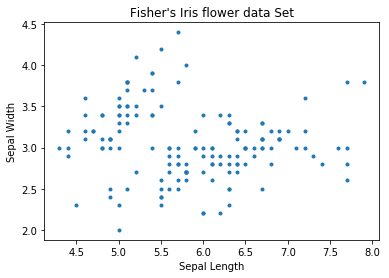

In [68]:
# Variable naming convention explained
# sepal length - sl
# sepal width - sw

sl = dataArray[:, 0]
sw = dataArray[:, 1]

pl.plot(sl, sw, '.')
pl.title('Fisher\'s Iris flower data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()
    

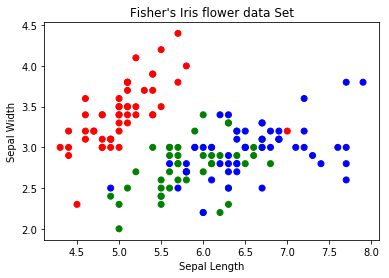

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 

In [83]:
sl = dataArray[:, 0]
sw = dataArray[:, 1]

colours=[]
for i in range(len(sl)):
    if i > 100:
        colours.append('blue')
    elif i > 50:
        colours.append('green')
    else:
        colours.append('red')



pl.scatter(sl, sw, c = colours)
pl.title('Fisher\'s Iris flower data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()

print(colours)